<a href="https://colab.research.google.com/github/bestdiya/MACHINE-LEARNING-PROJECTS/blob/main/Fuel_Efficiency_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df=pd.read_csv('/content/Train.csv')

In [143]:
df.head()

,engine_capacity_cc,fuel_category,owner_count,car_brand,transmission_type,exterior_color,fuel_efficiency_kmpl
0,5000,Petrol,2,Nissan,Automatic,Black,15.985031
1,1200,Diesel,3,Chevrolet,Manual,Gray,21.093824
2,5000,Diesel,4,Toyota,Automatic,Blue,9.789724
3,1000,Diesel,3,Chevrolet,Manual,Red,25.626237
4,1000,Diesel,1,BMW,Manual,Gray,22.844176


In [144]:
df.tail()

,engine_capacity_cc,fuel_category,owner_count,car_brand,transmission_type,exterior_color,fuel_efficiency_kmpl
14795,1200,Electric,2,Honda,Manual,White,13.749416
14796,1800,Electric,5,Hyundai,Automatic,White,18.629156
14797,1500,Electric,4,Hyundai,Manual,Gray,23.446285
14798,3000,Electric,5,Honda,Manual,Red,21.280763
14799,4000,Petrol,1,Kia,Automatic,Blue,8.249357


In [145]:
df.duplicated().sum()

np.int64(0)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14800 entries, 0 to 14799
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   engine_capacity_cc    14800 non-null  int64  
 1   fuel_category         14800 non-null  object 
 2   owner_count           14800 non-null  int64  
 3   car_brand             14800 non-null  object 
 4   transmission_type     14800 non-null  object 
 5   exterior_color        14800 non-null  object 
 6   fuel_efficiency_kmpl  14800 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 809.5+ KB


In [147]:
df['engine_capacity_cc'].describe()

,engine_capacity_cc
count,14800.000000
mean,2273.547297
std,1303.676541
min,800.000000
25%,1200.000000
50%,1800.000000
75%,3000.000000
max,5000.000000


In [148]:
df.shape

(14800, 7)

In [149]:
df['fuel_category'].value_counts()

,count
fuel_category,
Diesel,5017
Electric,4933
Petrol,4850


In [150]:
df['car_brand'].unique()

array(['Nissan', 'Chevrolet', 'Toyota', 'BMW', 'Tesla', 'Ford', 'Kia',
       'Volkswagen', 'Honda', 'Hyundai'], dtype=object)

In [151]:
df['car_brand'].value_counts()

,count
car_brand,
Ford,1516
Chevrolet,1501
Toyota,1499
Kia,1497
Nissan,1496
Honda,1496
Volkswagen,1483
Tesla,1461
BMW,1428


In [152]:
df['car_brand'].describe()

,car_brand
count,14800
unique,10
top,Ford
freq,1516


In [153]:
df['transmission_type'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [154]:
df['transmission_type'].value_counts()

,count
transmission_type,
Manual,7409
Automatic,7391


In [155]:
df['engine_capacity_cc'].describe()

,engine_capacity_cc
count,14800.000000
mean,2273.547297
std,1303.676541
min,800.000000
25%,1200.000000
50%,1800.000000
75%,3000.000000
max,5000.000000


In [156]:
df['fuel_efficiency_kmpl'].describe()

,fuel_efficiency_kmpl
count,14800.000000
mean,18.107292
std,4.871601
min,-0.987671
25%,14.850433
50%,18.099851
75%,21.366608
max,37.199996


In [157]:
df = df[df['fuel_efficiency_kmpl'] > 0]

In [158]:
print(df.columns)

Index(['engine_capacity_cc', 'fuel_category', 'owner_count', 'car_brand',
       'transmission_type', 'exterior_color', 'fuel_efficiency_kmpl'],
      dtype='object')


In [159]:
df.duplicated().sum()

np.int64(0)

In [160]:
df.drop(['owner_count', 'exterior_color'], axis=1, inplace=True)

In [161]:
df

,engine_capacity_cc,fuel_category,car_brand,transmission_type,fuel_efficiency_kmpl
0,5000,Petrol,Nissan,Automatic,15.985031
1,1200,Diesel,Chevrolet,Manual,21.093824
2,5000,Diesel,Toyota,Automatic,9.789724
3,1000,Diesel,Chevrolet,Manual,25.626237
4,1000,Diesel,BMW,Manual,22.844176
...,...,...,...,...,...
14795,1200,Electric,Honda,Manual,13.749416
14796,1800,Electric,Hyundai,Automatic,18.629156
14797,1500,Electric,Hyundai,Manual,23.446285
14798,3000,Electric,Honda,Manual,21.280763


In [162]:
df.isnull().sum()

,0
engine_capacity_cc,0
fuel_category,0
car_brand,0
transmission_type,0
fuel_efficiency_kmpl,0


In [163]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [164]:
X=df.drop(['fuel_efficiency_kmpl'], axis=1)

In [165]:
y=df['fuel_efficiency_kmpl']

In [166]:
X = pd.get_dummies(X, columns=['fuel_category', 'car_brand', 'transmission_type'], drop_first=True)
X = X.astype(int)

In [167]:
X

,engine_capacity_cc,fuel_category_Electric,fuel_category_Petrol,car_brand_Chevrolet,car_brand_Ford,car_brand_Honda,car_brand_Hyundai,car_brand_Kia,car_brand_Nissan,car_brand_Tesla,car_brand_Toyota,car_brand_Volkswagen,transmission_type_Manual
0,5000,0,1,0,0,0,0,0,1,0,0,0,0
1,1200,0,0,1,0,0,0,0,0,0,0,0,1
2,5000,0,0,0,0,0,0,0,0,0,1,0,0
3,1000,0,0,1,0,0,0,0,0,0,0,0,1
4,1000,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14795,1200,1,0,0,0,1,0,0,0,0,0,0,1
14796,1800,1,0,0,0,0,1,0,0,0,0,0,0
14797,1500,1,0,0,0,0,1,0,0,0,0,0,1
14798,3000,1,0,0,0,1,0,0,0,0,0,0,1


In [168]:
X.isnull().sum()

,0
engine_capacity_cc,0
fuel_category_Electric,0
fuel_category_Petrol,0
car_brand_Chevrolet,0
car_brand_Ford,0
car_brand_Honda,0
car_brand_Hyundai,0
car_brand_Kia,0
car_brand_Nissan,0
car_brand_Tesla,0


In [169]:
y

,fuel_efficiency_kmpl
0,15.985031
1,21.093824
2,9.789724
3,25.626237
4,22.844176
...,...
14795,13.749416
14796,18.629156
14797,23.446285
14798,21.280763


In [170]:
y.describe()

,fuel_efficiency_kmpl
count,14798.000000
mean,18.109845
std,4.866979
min,0.151030
25%,14.852977
50%,18.100326
75%,21.367457
max,37.199996


In [171]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [172]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [173]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# MSE
mse = mean_squared_error(y_test, dummy_preds)

# RMSE (manually)
rmse = np.sqrt(mse)

# R² Score
r2 = r2_score(y_test, dummy_preds)

print("Dummy RMSE:", rmse)
print("Dummy R² Score:", r2)


Dummy RMSE: 4.823526135200892
Dummy R² Score: -0.00014982565566579176


In [176]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [0.1, 1, 10],
#     'epsilon': [0.01, 0.1, 0.2],
#     'kernel': ['rbf', 'linear']
# }




In [177]:
# grid = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_root_mean_squared_error')


In [178]:
# grid.fit(X_train_scaled, y_train)



In [179]:
# print("Best Parameters (GridSearch):", grid_search.best_params_)
# best_model_grid = grid_search.best_estimator_
# best_model = grid.best_estimator_

In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = best_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Params:", grid.best_params_)
print("Test RMSE:", rmse)

Best Params: {'C': 0.1, 'epsilon': 0.2, 'kernel': 'linear'}
Test RMSE: 4.882810085177065


In [46]:
y.describe()

,fuel_efficiency_kmpl
count,14798.000000
mean,18.109845
std,4.866979
min,0.151030
25%,14.852977
50%,18.100326
75%,21.367457
max,37.199996


In [174]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
r2 = r2_score(y_test, rf_preds)

print("Random Forest RMSE:", rmse)
print("R² Score:", r2)

Random Forest RMSE: 4.932535290009497
R² Score: -0.04586635892723523


In [181]:
# ➤ STEP 6: Define and train models
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "SVR": SVR(C=0.1, epsilon=0.2, kernel='linear'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# ➤ STEP 7: Train, predict, evaluate
for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    if name == "SVR":
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    print(f"✅ RMSE: {rmse:.3f}")
    print(f"✅ R² Score: {r2:.3f}")


🔍 Model: SVR
✅ RMSE: 4.825
✅ R² Score: -0.001

🔍 Model: Random Forest
✅ RMSE: 4.933
✅ R² Score: -0.046

🔍 Model: Gradient Boosting
✅ RMSE: 4.832
✅ R² Score: -0.004


In [180]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Inside the loop
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)


In [182]:
# Only works for numeric features
df = df[df['fuel_efficiency_kmpl'] > 0]
print(df.corr(numeric_only=True)['fuel_efficiency_kmpl'].sort_values(ascending=False))


fuel_efficiency_kmpl    1.000000
engine_capacity_cc      0.005697
Name: fuel_efficiency_kmpl, dtype: float64


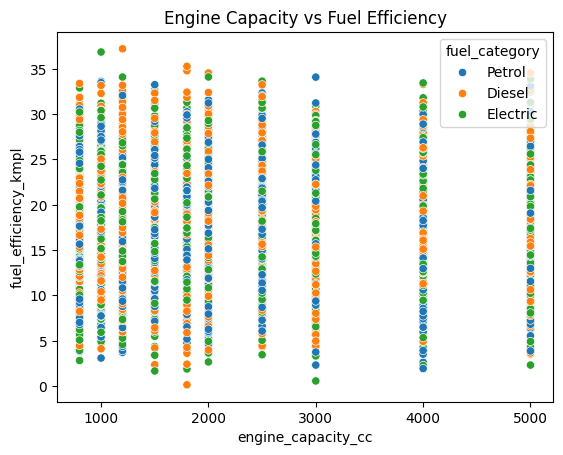

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='engine_capacity_cc', y='fuel_efficiency_kmpl', hue='fuel_category')
plt.title("Engine Capacity vs Fuel Efficiency")
plt.show()


In [184]:
from sklearn.linear_model import LinearRegression

X_simple = df[['engine_capacity_cc']]
y_simple = df['fuel_efficiency_kmpl']

X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print("Simple Linear RMSE:", rmse)
print("Simple Linear R²:", r2)


Simple Linear RMSE: 4.823381211294441
Simple Linear R²: -8.972711437227332e-05


In [185]:
print(df.corr(numeric_only=True))


                      engine_capacity_cc  fuel_efficiency_kmpl
engine_capacity_cc              1.000000              0.005697
fuel_efficiency_kmpl            0.005697              1.000000


In [188]:
# Load your test set (replace with your actual test CSV)
df_test = pd.read_csv('/content/Test.csv')  # Update filename

# Drop unused or irrelevant columns (same as training)
df_test_cleaned = df_test.drop(['owner_count', 'exterior_color'], axis=1, errors='ignore')

# One-hot encode categorical columns
df_test_encoded = pd.get_dummies(df_test_cleaned, columns=['fuel_category', 'car_brand', 'transmission_type'], drop_first=True)

# Align with training columns
df_test_encoded = df_test_encoded.reindex(columns=X.columns, fill_value=0)


In [189]:
X_submission_scaled = scaler.transform(df_test_encoded)


In [190]:
# Assuming SVR is already trained and stored in `models["SVR"]`
svr_model = models["SVR"]
submission_preds = svr_model.predict(X_submission_scaled)


In [191]:
# Create submission dataframe (replace 'id' if your test file has an ID column)
submission_df = pd.DataFrame({
    'id': df_test.index,  # or use df_test['some_id_column'] if provided
    'predicted_fuel_efficiency_kmpl': submission_preds
})

# Save to CSV
submission_df.to_csv('fuel_efficiency_submission.csv', index=False)
print("✅ Submission saved as fuel_efficiency_submission.csv")


✅ Submission saved as fuel_efficiency_submission.csv
